# HW 1

In [1]:
import numpy as np
import astropy.units as u
from astropy.units import imperial as imp
import astropy.constants as const
from astropy.time import Time
from astropy.coordinates import SkyCoord, FK5, EarthLocation, AltAz, get_sun
from astroplan.plots import plot_sky, plot_altitude
import astroplan as ap
from astroplan import FixedTarget, Observer

%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('image', origin='lower')
plt.rc('figure', figsize=(10, 6))
from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x1179ce1d0>

In [2]:
# Challenge: Unit conversions
time = 3 * u.Myr;
distance = np.array([1.2, 2.2, 1.7]) * u.kpc;
speed = distance / time;

# 1. Convert the speed above to miles/hour
print("1.",speed.to(imp.mi / u.hr));

# 2. Calculate whether a pint is more than half liter.
pint = 1 * imp.pint;
half_liter = 0.5 * u.liter;
print(f"2. A pint is more than half a liter: {pint > half_liter}\nThis is because astropy uses the US gallon definition.");

# 3. Calculate the area of a rectangle 3 km x 5 m. Show in m^2 and in yards^2.
length = 3 * u.km;
width = 5 * u.m;
area = length * width;
print(f'3. Area in meters^2 is {area.si}, area in yards^2 is {area.to(imp.yd**2)}');

1. [ 874903.5627065  1603989.86496192 1239446.71383421] mi / h
2. A pint is more than half a liter: False
This is because astropy uses the US gallon definition.
3. Area in meters^2 is 15000.0 m2, area in yards^2 is 17939.8506945162 yd2


In [3]:
# Challenge: Using equivalencies
# 1. Find out more about the spectral flux equivalency and convert 12mJy to erg/cm^2/s/Hz and to W/m^2/Hz
flux = 12 * u.mJy;
flux1 = flux.to(u.erg / u.cm**2 / u.s / u.Hz, equivalencies=u.spectral_density(3500 * u.AA));
flux2 = flux.to(u.W / u.m**2 / u.Hz, equivalencies=u.spectral_density(3500 * u.AA));
print(f"One unit: {flux1} \nAnother unit: {flux2}");

One unit: 1.2e-25 erg / (cm2 Hz s) 
Another unit: 1.2e-28 W / (Hz m2)


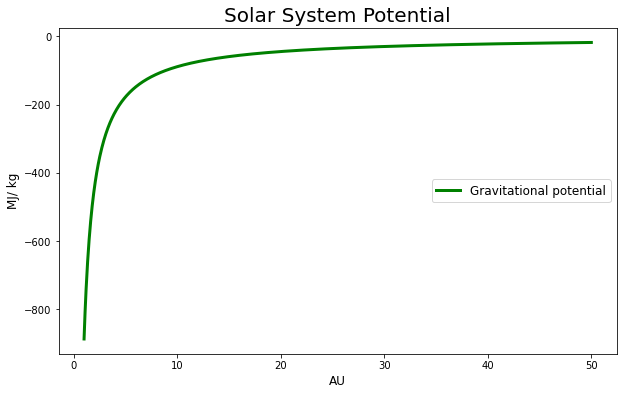

In [12]:
# Challenge: Plotting the solar system potential
# 1. The gravitational potential around a point source is V=-GM/r where M is the mass of the point and $r$ is the radius from it. 
#Use what we've seen above to make a plot of the gravitational potential (in MJ/kg) in the solar system between 1 and 50 AU.
r = np.linspace(1,50, 1000) * u.AU;
V = ((-const.G * const.M_sun)/r).to(u.MJ / u.kg);
plt.plot(r, V, color = 'green', linewidth = 3, label='Gravitational potential');
plt.xlabel('AU', fontsize=12);
plt.ylabel('MJ/ kg', fontsize=12);
plt.title('Solar System Potential', fontsize = 20);
plt.legend(fontsize=12, loc=5);
plt.show();

In [5]:
# Challenge
# 1. Construct a time object for the current time (note that there is a shortcut for this)
now = Time.now();

# 2. Find a way to get an ISO 8601 string for the current time, optionally with 6 decimal places
now_string = Time(now, format='iso', precision=6);

# 3. Find the number of minutes that have elapsed since the start of the course
start = Time('2021-03-26 19:00:00');
difference = now - start;
print(f"It has been {difference.to(u.min):.3f} since the start of the course.");

It has been 49722.343 min since the start of the course.


1. Crab Nebula in GC <SkyCoord (Galactic): (l, b) in deg
    (184.55745788, -5.78435671)>
2. Separation between CN and T Tauri is 17d07m33.0804s
3. Plot


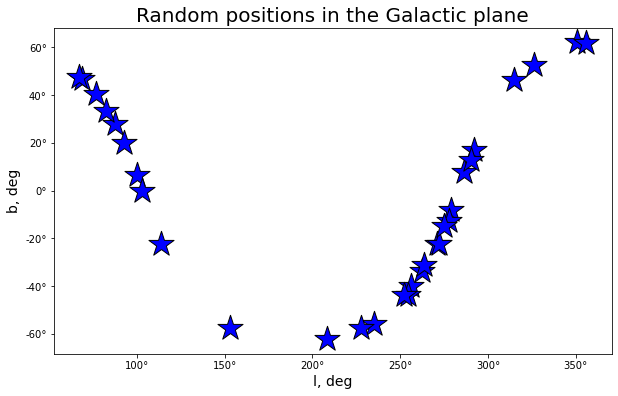

4. Method One


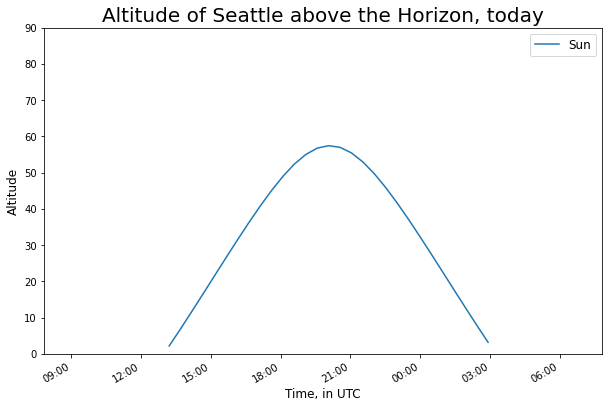

Method Two


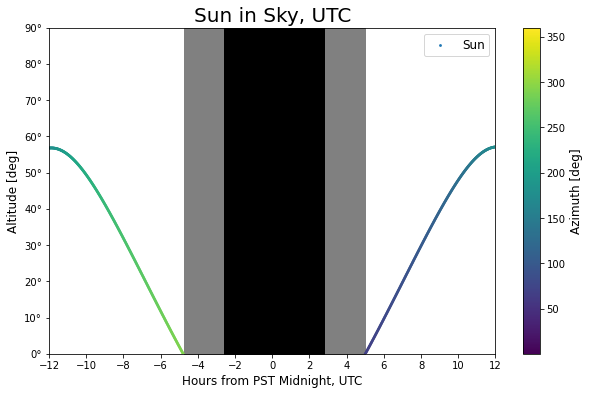

In [10]:
# 1. Find the coordinates of the Crab Nebula (M1) in ICRS coordinates, and convert them to Galactic Coordinates.
m1 = SkyCoord.from_name('M1');
print("1. Crab Nebula in GC", m1.transform_to('galactic'));

# 2. Find the separation on the sky between the Crab Nebula and the star 'T Tauri' in degrees
t_tauri = SkyCoord.from_name('T Tauri');
print("2. Separation between CN and T Tauri is", (m1.separation(t_tauri)).to(u.deg));

# 3. Generate random positions in the Galactic plane (between l=0 and l=360 and b=-1 and b=+1), then make a plot showing the 
# position on the sky of these points in FK5.
def galactic_graph():
    l = np.random.uniform(0, 360, 30) * u.deg
    b = np.random.uniform(-1, 1, 30) * u.deg
    random = SkyCoord(l, b, frame = 'galactic')
    random = random.transform_to(FK5(equinox='J2020'))
    print('3. Plot')
    plt.scatter(random.ra, random.dec, marker='*', color='blue', edgecolors='black', s=700);
    plt.title("Random positions in the Galactic plane", fontsize=20)
    plt.xlabel("l, deg", fontsize=14);
    plt.ylabel("b, deg", fontsize=14);
    plt.show()
    return
galactic_graph()

# 4. Make a plot showing the altitude above the horizon of the Sun as seen from Seattle over the course of today.
# method one, my own
def method_one():
    seattle = Observer(latitude = 47.6062 * u.deg, longitude = -122.3321 * u.deg, elevation = 0 * u.m, timezone = 'US/Pacific')
    sun = FixedTarget(get_sun(Time.now()), name="Sun")
    time = Time.now() + np.linspace(0, 24, 50)*u.hour
    print("4. Method One")
    fig, ax = plt.subplots(1,1)
    plot_altitude(sun, seattle, time);
    ax.set_title('Altitude of Seattle above the Horizon, today', fontsize=20);
    ax.set_ylabel('Altitude', fontsize=12);
    ax.set_xlabel('Time, in UTC', fontsize=12);
    ax.legend(fontsize=12);
    plt.show()
    return

#modified from documentation 
#https://docs.astropy.org/en/stable/generated/examples/coordinates/plot_obs-planning.html#sphx-glr-generated-examples-[…]dinates-plot-obs-planning-py
def method_two():
    seattle = EarthLocation(lat = 47.6062 * u.deg, lon = -122.3321 * u.deg, height = 0 * u.m)
    utc_off = -8*u.hour  # Pacific Standard Time
    midnight = Time('2021-4-29 00:00:00') - utc_off
    delta = np.linspace(-12, 12, 1000)*u.hour
    times = midnight + delta
    frame = AltAz(obstime=times, location=seattle)
    sun_altaz = get_sun(times).transform_to(frame)
    print("Method Two")
    plt.scatter(delta, sun_altaz.alt, c=sun_altaz.az, label='Sun', lw=0, s=8, cmap='viridis')
    plt.fill_between(delta, 0, 90, sun_altaz.alt < -0*u.deg, color='0.5', zorder=0)
    plt.fill_between(delta, 0, 90, sun_altaz.alt < -18*u.deg, color='k', zorder=0)
    plt.colorbar().set_label('Azimuth [deg]', fontsize = 12)
    plt.legend(loc='upper right', fontsize = 12)
    plt.xlim(-12, 12)
    plt.xticks((np.arange(13)*2-12))
    plt.title('Sun in Sky, UTC', fontsize = 20)
    plt.ylim(0, 90)
    plt.xlabel('Hours from PST Midnight, UTC', fontsize = 12)
    plt.ylabel('Altitude [deg]', fontsize = 12)
    plt.show()
    return

method_one()
method_two()